In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from astropy.table import Table
# from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel, Trapezoid1DKernel
from scipy.optimize import curve_fit

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [191]:
# let's get the machinery working first!
# NEED: best fits & errors from Diana's fitting
# FOR NOW: just make approx. data from the plot she sent:
# and add approx datapoint from Strohmeier+1965

years = np.array([1900,1910,1925,1940,1943,1945, 1964, 1972, 1991, 2001,2003,2005,2008, 2019], dtype=np.float)
incl = np.array([69., 70., 80.5, 82., 83., 84.,  88.9, 85.3, 79.83, 77, 76, 76.5, 74.5, 71.], dtype=np.float)
ierr = np.array([15, 8, 2., 2., 2., 2., 1.1, .41, .21, .2, .2, .3,.5 ,.1], dtype=np.float)

Text(0.5, 1.0, 'WARNING: FAKE DATA')

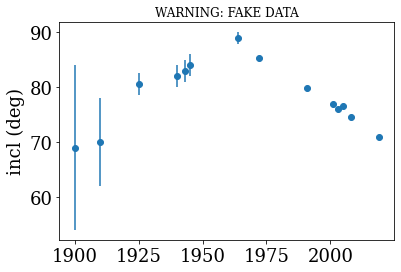

In [192]:
plt.errorbar(years, incl, yerr=ierr, linestyle='none', marker='o')
plt.ylabel('incl (deg)')
plt.title('WARNING: FAKE DATA', fontsize=12)

In [100]:
# OK, let's read papers and try to model the nodal period!

In [193]:
# here is the eqn being used to model nodal period in 3body system
def Pmodel(t, c1, c2, t0, Pnodal):
    # c1 == cos(I) x cos(i_1)
    # c2 == sin(I) x sin(i_1)
    cosi = c1 - c2*np.cos(2*np.pi * (t - t0) / Pnodal)
    return cosi

[0.02, 0.6, 2434.25, 631.0]


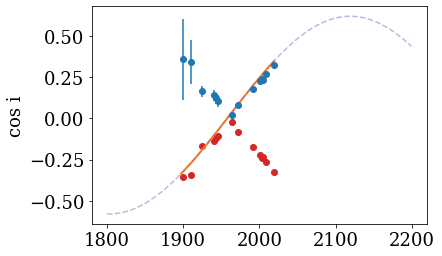

In [194]:
cosi = np.cos(np.deg2rad(incl))
cosi_err = np.abs(np.sin(np.deg2rad(incl)) * np.deg2rad(ierr))
plt.errorbar(years, cosi, yerr=cosi_err,
            linestyle='none', marker='o')
plt.ylabel('cos i')
plt.scatter(years, -np.cos(np.deg2rad(incl)), c='C3')

tt = np.arange(1897, 2020)
# just make up some values to guess & draw a curve, but we know it's ~631yrs
# p0 = [2.3, 2.3, 1961., 631.]
p0 = [.02, .6, 1961 + (631.*0.75), 631.]
print(p0)
plt.plot(tt, Pmodel(tt, *p0), lw=2) 
tfuture = np.arange(1800,2200)
plt.plot(tfuture, Pmodel(tfuture, *p0), c='C4', linestyle='--', alpha=0.5) 

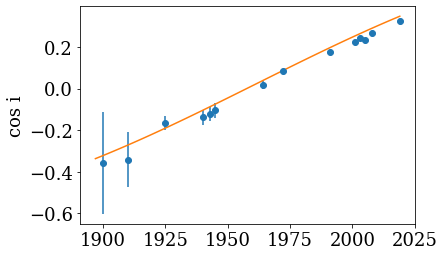

In [195]:
neg = np.where((years < 1961))[0]
cosi[neg] = -1*cosi[neg]

plt.errorbar(years, cosi, yerr=cosi_err,
            linestyle='none', marker='o')
plt.ylabel('cos i')

plt.plot(tt, Pmodel(tt, *p0)) 

-0.33836829506664523
1063.929467532099


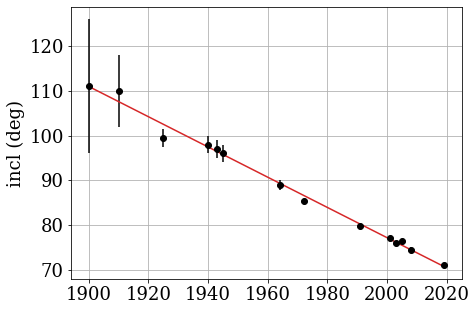

In [199]:
# the simple linear inclination change model - a system slowly tumbling 

plt.figure(figsize=(7,5))
plt.errorbar(years, np.rad2deg(np.arccos(cosi)), yerr=ierr, marker='o', linestyle='none', c='k')

ff = np.polyfit(years, np.rad2deg(np.arccos(cosi)), 1)
plt.plot(years, np.polyval(ff, years),c='C3')

plt.ylabel('incl (deg)')
print(ff[0]) # the slope in deg per year
print(np.abs(360/ff[0])) # the number of years to do a full tumble (360deg)

plt.grid(True)
plt.savefig('approx_incl.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [200]:
# approx when will it eclipse again? (half a tumble cycle)
(18 - ff[1])/ff[0]

2174.818689789585

[1.00000000e-01 1.00000000e+00 2.84182851e+03 1.15254301e+03]
[4.42766215e-01 3.35630633e+00 2.88252670e+03 3.91535094e+03]
1152.5430053475482 3915.350939053772


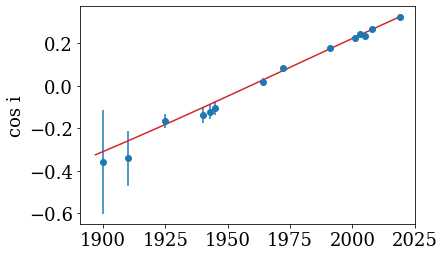

In [197]:
fit, cov = curve_fit(Pmodel, years, cosi, sigma=cosi_err, p0=p0,
                     maxfev=10000, bounds = ([-0.1, -1, 1000, 400], [0.1, 1, 3000, 1800]))

print(fit)
print(np.sqrt(np.diag(cov)))

print(fit[3], np.sqrt(np.diag(cov))[3]) # the nodal period from this... "fit"

plt.errorbar(years, cosi, yerr=cosi_err,
            linestyle='none', marker='o')
plt.plot(tt, Pmodel(tt, *fit), c='C3') 
plt.ylabel('cos i');

Text(0.5, 1.0, 'WARNING: FAKE DATA')

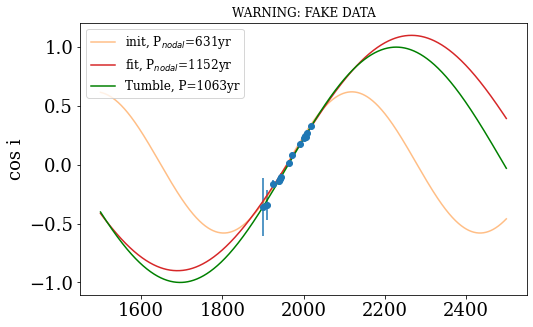

In [198]:
tfuture = np.arange(1500,2500)
plt.figure(figsize=(8,5))
plt.errorbar(years, cosi, yerr=cosi_err,
            linestyle='none', marker='o')

plt.plot(tfuture, Pmodel(tfuture, *p0), c='C1', alpha=0.5, label='init, P$_{nodal}$=631yr') 
plt.plot(tfuture, Pmodel(tfuture, *fit), c='C3', label='fit, P$_{nodal}$='+str(int(fit[3]))+'yr') 
plt.plot(tfuture, np.cos(np.deg2rad(np.polyval(ff, tfuture))), c='g', label='Tumble, P='+str(int(np.abs(360/ff[0])))+'yr')
plt.legend(fontsize=12)
plt.ylabel('cos i')
plt.title('WARNING: FAKE DATA', fontsize=12)